<a href="https://colab.research.google.com/github/KOT1HATOP/ml_labs/blob/main/lab4/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Методы кластеризации и оценка качества кластеризации

Загрузите набор данных из файла cluster datasets в соответствии с вашим вариантом (если считаете, что набор данных не представляет необходимой информации или сложен для интерперетации или, то можно выбрать другой - но **необходимо предварительное согласование**).

In [18]:
!pip install detectorusoutlierus

import pandas as pd
import seaborn as sns
import matplotlib
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import matplotlib.pyplot as plt
from detectorusoutlierus import outliers as do

In [7]:
# чтение файла

df = pd.read_csv("c_0100.csv")
df

,x,y,z,vx,vy,vz,m,id
0,-0.043497,0.105297,0.138277,-0.212943,-0.404257,-0.605191,0.000016,8427
1,-0.040714,0.108759,0.136523,0.204248,0.109212,-0.873800,0.000016,44328
2,-0.498487,-1.699947,0.132564,0.262516,-0.324764,0.562522,0.000016,4
3,-0.180061,0.772876,-0.091783,0.031714,0.423959,0.106319,0.000016,38907
4,0.011865,0.426583,0.485580,0.005719,-0.581521,-0.088140,0.000016,6
...,...,...,...,...,...,...,...,...
63992,1.058976,1.956077,-0.386337,-0.118746,-0.553942,-0.208733,0.000016,63996
63993,0.753311,0.004259,0.111236,-0.794958,-0.153329,0.131538,0.000016,63997
63994,0.064444,-0.159256,-0.620617,0.244356,-0.082614,-0.113567,0.000016,63998
63995,0.180758,1.093747,0.601112,-0.379059,-0.388060,0.007006,0.000016,63999


Используйте представленные в практике методы кластеризации (помните, что кластеры строятся по классам).

Несколько правил перед выполнением задания:
0. Внимательно изучить практику 4!
1. Служебные комментарии читать внимательно и не удалять
2. Выполнить до 10-11-2023 (но не затягивать, таск не простой!)


P.S. Мгномерные данные - данные, в которых количество колонок > 3

P.S.S. Служебные комментарии - ячейки с описанием задачи в """ task description """



In [ ]:
"""
Предварительно - оптимизируйте ваш набор данных.
1. Удалить лишние колонки (порядковые признаки, с множеством пропусков, с кучей выбросов, ....)
2. Обработайте выбросы и пропуски (Для удобства - ваш коллега сделал библиотеку в pypi для анализа выбросов - подробности уточняйте в группе)
3. Скопируйте df в df_cluster # df_cluster = df.copy()
далее вы работаете с ним
4. Выполните масштабирование числовых признаков StandatdScaler || MinMaxScaler, в df_cluser замените числовые признаки на отмасштабированные
5. Для кагегориальных значений используйте LabelEncoder - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html. В df_cluster замените на encoded признаки
"""

In [9]:
# your_code here

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63997 entries, 0 to 63996
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       63997 non-null  float64
 1   y       63997 non-null  float64
 2   z       63997 non-null  float64
 3   vx      63997 non-null  float64
 4   vy      63997 non-null  float64
 5   vz      63997 non-null  float64
 6   m       63997 non-null  float64
 7   id      63997 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 3.9 MB


In [10]:
df = df.drop(columns=["id"])

<Axes: >

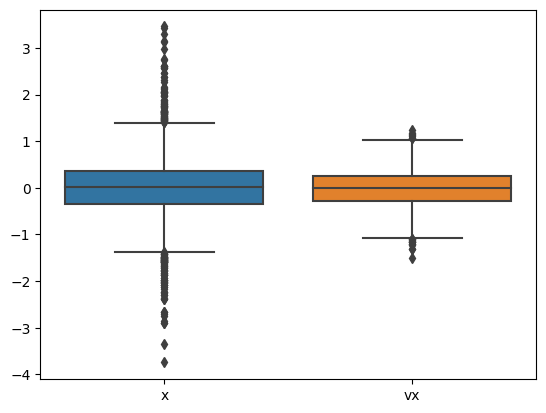

In [13]:
df_cluster = df[["x","vx"]]

df_cluster = df_cluster.sample(n=2000)

sns.boxplot(df_cluster)

In [14]:
from statistics import median, mean
from sklearn.cluster import DBSCAN

class Outline:
  def __init__(self, df):
    self.df = df
  def detec_otline_by_showene(self, column_name):
        res = []
        n = self.df[column_name].count()
        mean = self.df[column_name].mean()
        std = self.df[column_name].std()
        for index, value in self.df.iterrows():
            if math.erfc((abs(value[column_name] - mean)) / std) < 1 / (2 * n):
                res.append((index, value[column_name]))
            else:
                n -= 1
        return res

  def detect_outline_by_quantile(self, column_name):
        Q1 = self.df[column_name].quantile(0.25)
        Q3 = self.df[column_name].quantile(0.75)
        minimum = Q1 - 1.5 * (Q3 - Q1)
        maximum = Q3 + 1.5 * (Q3 - Q1)
        outliers = self.df[(self.df[column_name] < minimum) | (self.df[column_name] > maximum)]
        return outliers.items()
  def delete_outline_by_mean(self, column_name):
    mean_data = mean(self.df[column_name])
    maximum = mean_data * 2
    result = []

    for item in self.df[column_name]:
      if abs(item - mean_data) < maximum:
        result.append(item)

    return result
  def detect_outline_by_mean_std(self,column_name,coef):
        mean = self.df[column_name].mean()
        median = self.df[column_name].median()
        std = self.df[column_name].std()
        n = self.df[column_name].count()
        lower_bound = mean - coef  * std
        upper_bound = mean + coef * std
        outliners = self.df[(self.df[column_name] >= lower_bound) & (self.df[column_name]<=upper_bound)]
        return outliners.items()
  def detect_outliner_by_DBSCAN(self, col1, col2, eps, min_samples=2):
        data = self.df[[col1, col2]].to_numpy()

        db = DBSCAN(eps=eps, min_samples=min_samples).fit(data)
        labels = db.labels_

        # Вычисление количества элементов в каждом кластере
        unique, counts = np.unique(labels, return_counts=True)
        clusters_counts = dict(zip(unique, counts))
        print(labels)
        # Поиск кластеров с количеством элементов <= 2
        small_clusters = [cluster for cluster, count in clusters_counts.items() if count <= 2]
        print(small_clusters)

        # Возвращение индексов строк для этих кластеров
        outlier_indices = self.df.index[np.isin(labels, small_clusters)].tolist()

        return outlier_indices

In [19]:
outliner_detector = do.Outline(df_cluster)

df_cluster

,x,vx
21785,-0.570194,-0.531881
25458,-0.684557,-0.443850
50702,-0.421127,-0.437390
39106,0.499381,-0.217638
43453,0.061700,-0.663596
...,...,...
27177,0.525595,0.181719
9532,0.662661,-0.018658
1068,-0.665874,0.809488
35605,0.886767,-0.039070


<Axes: >

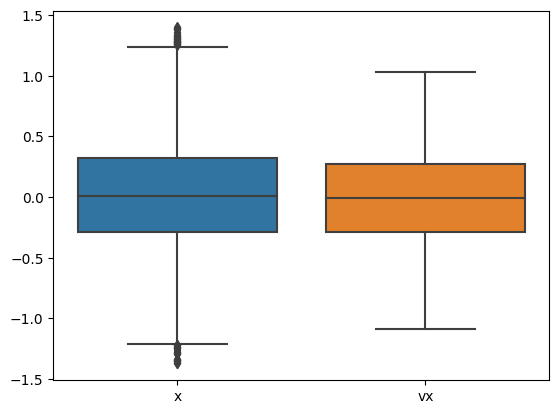

In [20]:
for col in df_cluster.columns:
    outliners = outliner_detector.detect_outlier_kvart(col)
    df_cluster = pd.concat([df_cluster,outliners,outliners]).drop_duplicates(keep=False)

sns.boxplot(df_cluster)

In [21]:
df_cluster.describe()

,x,vx
count,1817.000000,1817.000000
mean,0.016322,-0.006702
std,0.526306,0.414716
min,-1.370815,-1.085273
25%,-0.291160,-0.289991
50%,0.010258,-0.005811
75%,0.325712,0.270731
max,1.398304,1.032685


In [22]:
df_cluster.columns

Index(['x', 'vx'], dtype='object')

In [23]:
df_cluster

,x,vx
21785,-0.570194,-0.531881
25458,-0.684557,-0.443850
50702,-0.421127,-0.437390
39106,0.499381,-0.217638
43453,0.061700,-0.663596
...,...,...
27177,0.525595,0.181719
9532,0.662661,-0.018658
1068,-0.665874,0.809488
35605,0.886767,-0.039070


In [24]:
df_cluster.x.unique()

array([-0.57019389, -0.68455684, -0.42112654, ..., -0.66587377,
        0.88676697, -0.37006462])

In [25]:
"""
Здесь k-means и метрики. Используйте несколько вариантов метрик (из практики), для поиска оптимального числа кластеров.
"""

from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score,silhouette_score,davies_bouldin_score

In [26]:
# your_code here

calinsk_score = []
sillhouette_score = []
davies_score = []

for k in range(2,11):
    kmeans = KMeans(n_clusters=k,n_init=10,random_state=42)
    kmeans.fit(df_cluster)
    calinsk_score.append(calinski_harabasz_score(df_cluster,kmeans.labels_))
    sillhouette_score.append(silhouette_score(df_cluster,kmeans.labels_))
    davies_score.append(davies_bouldin_score(df_cluster,kmeans.labels_))

In [27]:
print(f"Число кластеров calinski_harabasz_score - {calinsk_score.index(max(calinsk_score))+2} c баллом {max(calinsk_score)}")
print(f"Число кластеров silhouette_score - {sillhouette_score.index(max(sillhouette_score))+2} c баллом {max(sillhouette_score)}")
print(f"Число кластеров davies_bouldin_score - {davies_score.index(min(davies_score))+2} c баллом {max(davies_score)}")

Число кластеров calinski_harabasz_score - 4 c баллом 1358.3379793447305
Число кластеров silhouette_score - 4 c баллом 0.37367409528596296
Число кластеров davies_bouldin_score - 4 c баллом 1.1855433079291104


In [ ]:
"""
Здесь визуализация кластеров k-means
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

In [ ]:
# your_code here

In [ ]:
"""
Здесь DBSCAN и метрики. Используйте поиск оптимального EPS. Объясните почему?
"""

In [ ]:
# your_code here

In [ ]:
"""
Здесь визуализация кластеров DBSCAN
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

In [ ]:
# your_code here

In [ ]:
"""
Здесь иерархическая кластеризация и метрики
"""

In [ ]:
# your_code here

In [ ]:
"""
Здесь визуализация кластеров иерархической кластеризации
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

In [ ]:
# your_code here

In [ ]:
!pip install ydata-profiling

Выполните профилирование набора данных относительно кластеров, используя оригинальный набор данных.

P.S. задание для всех

In [ ]:
#
#### Приветсвуется ручной анилиз - гарфики, статистика по разным кластерам, как альтернативный путь решения задачи
#

# 1. в оригинальный набор данных добавьте колонки с кластерами и работаем с ним

"""
df['kmeans_cluster'] = kmeans_cluster.labels_
df['dbsscan_cluster'] = dbsscan_cluster.labels_
...
"""

# 2. Выполните фильтрацию относительно каждого кластера и каждого алгоритма (Внимание, кластер -1 не учитываем в DBSSCAN, тк это выбросы. То есть, точки не вошли ни в одни кластер)
"""
P.S за пример взять 1 тип кластеров, выполните для всех (если кластеров больше 3, разрешено использовать первые три кластера для анализа)

from ydata_profiling import ProfileReport
df['dbscan_labels'] = dbscan.labels_

uniq_labels = tuple(set(dbscan.labels_))

print(uniq_labels)

"""

# 3. Выполните профилирование
"""
На отдельной ячейке выполните профилирование для каждого кластера и каждого алгоритма

from ydata_profiling import ProfileReport

ProfileReport(df[df.dbscan_labels == 0]) # фильтруем по кластерам из uniq_labels, получаем красивый результат :)

"""

# 4. Проанализируйте результат по кластерам. Какие переменные попали в каждый кластер, их различия (статистические), графики.
# Постарайтесь объяснить различия "фактически".
# Например, видно, что в кластер 1 у пациентов возраст выше в среднем и в медиане, чем в остальных, что может свидетельствоать о влиянии возраста на кластер №()



In [ ]:
# your_code here